In [1]:
#James Alfano
#Import needed libaries 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import cv2

In [2]:
#Import data
from glob import glob
#Change file path to YOUR specific file path
data = glob('/Users/jamesalfano/Downloads/Histo/**/*.png', recursive=True)

In [3]:
#Separate the labels from the images
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [4]:
x=np.stack(images)

In [5]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [6]:
from sklearn.model_selection import train_test_split
#Split training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [7]:
#Buiding the model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(100, 100, 3)), #standarizing the data
  layers.Conv2D(64,(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128,(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(256,(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(2)
])

In [8]:
#Compile the model
model.compile(optimizer='Adam',loss='mae',metrics=['accuracy']) #This one

In [9]:
#Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0

In [10]:
#Training the model
history=model.fit(x_train,y_train,epochs=15,validation_split=0.3,batch_size=56)

Epoch 1/15
150/150 [==============================] - 197s 1s/step - loss: 1.7943 - accuracy: 0.7464 - val_loss: 0.4619 - val_accuracy: 0.7742
Epoch 2/15
150/150 [==============================] - 194s 1s/step - loss: 0.1902 - accuracy: 0.8636 - val_loss: 0.4299 - val_accuracy: 0.7742
Epoch 3/15
150/150 [==============================] - 194s 1s/step - loss: 0.1706 - accuracy: 0.8602 - val_loss: 0.3565 - val_accuracy: 0.8208
Epoch 4/15
150/150 [==============================] - 194s 1s/step - loss: 0.1674 - accuracy: 0.8702 - val_loss: 0.9643 - val_accuracy: 0.3039
Epoch 5/15
150/150 [==============================] - 193s 1s/step - loss: 0.1563 - accuracy: 0.8748 - val_loss: 0.3056 - val_accuracy: 0.7728
Epoch 6/15
150/150 [==============================] - 193s 1s/step - loss: 0.1577 - accuracy: 0.8711 - val_loss: 1.2638 - val_accuracy: 0.7717
Epoch 7/15
150/150 [==============================] - 194s 1s/step - loss: 0.1470 - accuracy: 0.8798 - val_loss: 0.3202 - val_accuracy: 0.8056

In [11]:
#Testing 
#A high Accuracy and a low loss is desired
loss,accuracy=model.evaluate(x_test,y_test)

94/94 [==============================] - 19s 204ms/step - loss: 0.6130 - accuracy: 0.3533


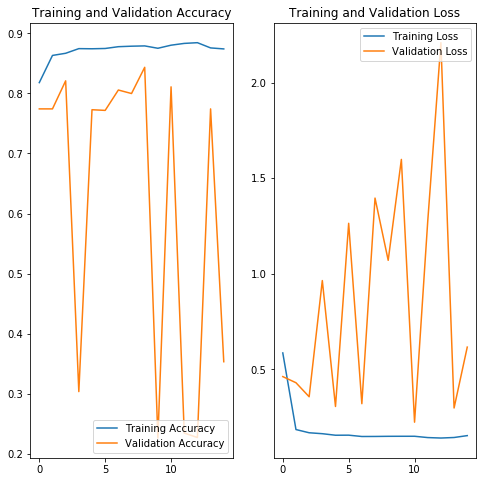

In [12]:
#Visualize Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
#To fix potential overfitting a data_augmentation step is created
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(100, 
                                                              100,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [14]:
#To fix potential overfitting a data_augmentation step and Drop out layer is added to the model
model = Sequential([
  data_augmentation, #Added data_augmentation step to the model
  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (100,100,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #Add Drop out layer
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(2)
])

In [15]:
#Compile the new model
model.compile(optimizer='Adam',loss='mae',metrics=['accuracy']) 

In [16]:
#New Model summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 100, 100, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)       

In [17]:
#Training the New model
history=model.fit(x_train,y_train,epochs=15,validation_split=0.3,batch_size=56)

Epoch 1/15
150/150 [==============================] - 40s 259ms/step - loss: 0.7281 - accuracy: 0.7100 - val_loss: 0.2386 - val_accuracy: 0.7742
Epoch 2/15
150/150 [==============================] - 42s 282ms/step - loss: 0.2414 - accuracy: 0.7692 - val_loss: 0.2333 - val_accuracy: 0.7742
Epoch 3/15
150/150 [==============================] - 40s 264ms/step - loss: 0.2347 - accuracy: 0.7756 - val_loss: 0.2379 - val_accuracy: 0.7742
Epoch 4/15
150/150 [==============================] - 40s 269ms/step - loss: 0.2342 - accuracy: 0.7744 - val_loss: 0.2353 - val_accuracy: 0.7742
Epoch 5/15
150/150 [==============================] - 40s 267ms/step - loss: 0.2318 - accuracy: 0.7761 - val_loss: 0.2264 - val_accuracy: 0.7742
Epoch 6/15
150/150 [==============================] - 39s 262ms/step - loss: 0.2214 - accuracy: 0.7853 - val_loss: 0.2317 - val_accuracy: 0.7742
Epoch 7/15
150/150 [==============================] - 39s 262ms/step - loss: 0.2336 - accuracy: 0.7693 - val_loss: 0.2312 - val_ac

In [18]:
#Testing the new model (Corrected for Overfitting)
#A high Accuracy and a low loss is desired
loss,accuracy=model.evaluate(x_test,y_test)

94/94 [==============================] - 4s 45ms/step - loss: 0.1678 - accuracy: 0.8683


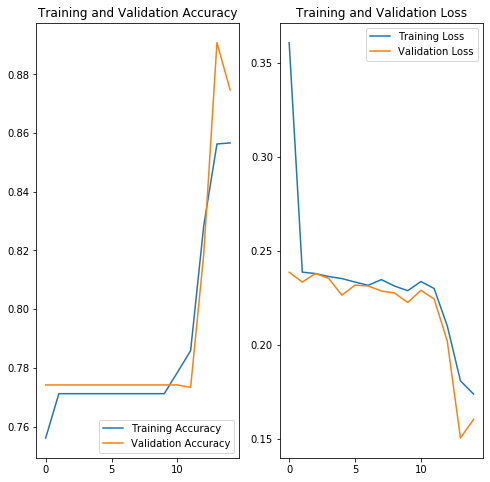

In [19]:
#Visualize the new Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()